# Begining of Basic Image Processing

In [236]:
:dep anyhow = "1.0.66"
:dep opencv = "0.70.0"
:dep cv-convert = { version = "0.21.2", features=["opencv_0-70", "image_0-23", "nalgebra_0-31", "ndarray_0-15"] }
:dep image = "0.23"
:dep evcxr_image = "1.1.0"
:dep ndarray = "0.15.6"
:dep nalgebra = "0.31.2"
:dep plotters = { version = "^0.3.0", default_features = false, features = ["evcxr", "all_series"] }
extern crate plotters;

use std::fs;
use std::path::{Path};
use anyhow::{anyhow, Result, Error};
use opencv::prelude::*;
use cv_convert::{FromCv, IntoCv, TryFromCv, TryIntoCv};
use image::{ImageBuffer, RgbImage, Rgb};
use evcxr_image::ImageDisplay;
use plotters::prelude::*;

#[macro_use]
extern crate nalgebra as na;

fn opencv_imshow(img: &Mat) {
    let img_rgb = RgbImage::new(img.cols() as u32, img.rows() as u32);
    let data: Vec<u8> = img.data_bytes().unwrap().to_vec();
    let channels: u32 = img.channels() as u32;
    image::ImageBuffer::from_fn(img_rgb.width(), img_rgb.height(), | x, y | {
        let yi = y * img_rgb.width();
        let i: usize = ((x + yi) * channels) as usize;
        match channels {
            3 => {
                let b = data[i];
                let g = data[i + 1];
                let r = data[i + 2];
                image::Rgb([r, g, b])
            },
            _ => {
                let b = data[i];
                image::Rgb([b, b, b])
            }
        }
    }).evcxr_display()
}

let image_dir = "/home/cloud-user/workspace/KU15627-Computer-Vision/images";

In [201]:
for file in fs::read_dir(image_dir)?.filter_map(|file| file.ok()) {
    println!("{}", file.path().to_path_buf().file_name().unwrap().to_str().unwrap());
  }

Airplane.bmp
Balloon.bmp
Sailboat.bmp
Earth.bmp
Aerial.bmp
Parrots.bmp
Pepper.bmp
Lenna.bmp
Mandrill.bmp
Girl.bmp
couple.bmp
milkdrop.bmp


()

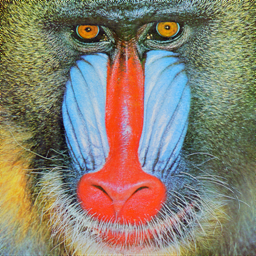

In [203]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(&img)

In [204]:
println!("height: {}", img.cols());
println!("width: {}", img.rows());
println!("channels: {}", img.channels());

height: 256
width: 256


channels: 3


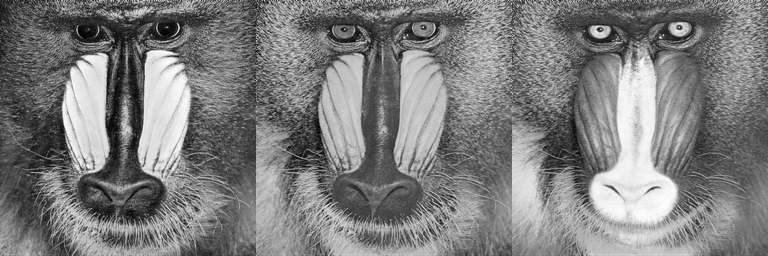

In [205]:
let mut channels: opencv::core::Vector<Mat> = opencv::types::VectorOfMat::new();
opencv::core::split(&img, &mut channels);

let mut dest: Mat = Default::default();
opencv::core::hconcat(&channels, &mut dest).expect("error on concat");
opencv_imshow(&dest)

In [206]:
fn color_hist(img: &Mat) {
    evcxr_figure((480, 320), |root| {
        root.fill(&WHITE)?;
        let mut chart = ChartBuilder::on(&root)
            .caption("Histogram", ("Arial", 20).into_font())
            .margin(5)
            .x_label_area_size(30)
            .y_label_area_size(30)
            .build_cartesian_2d(0..256, -30..610)?;
        chart.configure_mesh().draw()?;
        let color = vec!("b", "g", "r");
        for (i, col) in color.iter().enumerate() {
            // in python, you can just execute
            // histr = cv2.calcHist([img],[i],None,[256],[0,256])
            // the first argument is 
            // the second argument is
            // and the third argument is mask ~ in Rust, you cannot input null value like None in python. so, we use Mat::default()? as None.
            let mut hist = Mat::default();
            opencv::imgproc::calc_hist(
                &opencv::types::VectorOfMat::from(vec![img.clone()]),
                &opencv::types::VectorOfi32::from(vec![i as i32]),
                &Mat::default(),
                &mut hist,
                &opencv::types::VectorOfi32::from(vec![256]),
                &opencv::types::VectorOff32::from(vec![0., 256.]),
                false
            ).expect("calc histogram failed.");
            // TODO: Draw histogram 
            // https://docs.opencv.org/4.6.0/d8/dbc/tutorial_histogram_calculation.html
        }
        Ok(())
    }).evcxr_display()
}

color_hist(&img)

()

# Different Brightness / Contrast

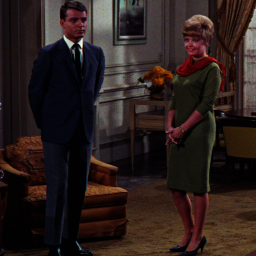

In [207]:
let image_path = Path::new(image_dir).join("couple.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(&img)

In [208]:
color_hist(&img)

()

# Normalize Brightness

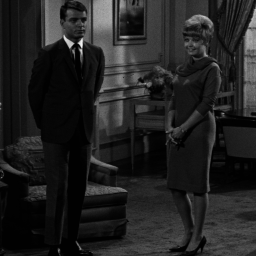

In [209]:
let mut img_gray: Mat = Default::default();
opencv::imgproc::cvt_color(&img, &mut img_gray, opencv::imgproc::COLOR_BGR2GRAY, 0).expect("error on cvt_color");
opencv_imshow(&img_gray)

In [210]:
fn gray_hist(img: &Mat) {
    evcxr_figure((480, 320), |root| {
        root.fill(&WHITE)?;
        let mut chart = ChartBuilder::on(&root)
            .caption("Histogram", ("Arial", 20).into_font())
            .margin(5)
            .x_label_area_size(30)
            .y_label_area_size(30)
            .build_cartesian_2d(0..256, -30..610)?;
        chart.configure_mesh().draw()?;
        let color = vec!("b", "g", "r");
        for (i, col) in color.iter().enumerate() {
            // in python, you can just execute
            // histr = cv2.calcHist([img],[i],None,[256],[0,256])
            // the first argument is 
            // the second argument is
            // and the third argument is mask ~ in Rust, you cannot input null value like None in python. so, we use Mat::default()? as None.
            let mut hist = Mat::default();
            opencv::imgproc::calc_hist(
                &opencv::types::VectorOfMat::from(vec![img.clone()]),
                &opencv::types::VectorOfi32::from(vec![i as i32]),
                &Mat::default(),
                &mut hist,
                &opencv::types::VectorOfi32::from(vec![256]),
                &opencv::types::VectorOff32::from(vec![0., 256.]),
                false
            ).expect("calc histogram failed.");
            // TODO: Draw histogram 
            // https://docs.opencv.org/4.6.0/d8/dbc/tutorial_histogram_calculation.html
        }
        Ok(())
    }).evcxr_display()
}

gray_hist(&img)

()

In [278]:
let flattened_raw: Vec<u8> = img_gray.reshape(1, 1)?.to_vec_2d::<u8>()?.get(0).unwrap().to_owned();
let flattened_f64: Vec<f64> = flattened_raw.into_iter().map(|x| x as f64).collect();
let flattened: ndarray::Array<f64, ndarray::Ix1> = ndarray::Array::from_vec(flattened_f64);
let mean = flattened.mean().unwrap();
let std = flattened.std(0.);
println!("mean: {:?}, standard deviation: {:?}", mean, std);


mean: 33.37681579589844, standard deviation: 31.623476143151514


In [ ]:
// TODO: rewrite imgGrayMod = np.clip(127 + (imgGray.astype(np.float)-ave)/(3.0*std) * 127, 0, 255).astype(np.uint8)

# Binarization
* Threshold
* OTSU Method

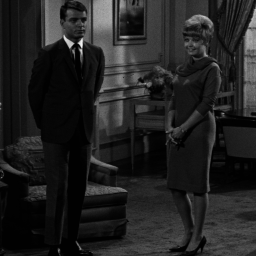

In [211]:
opencv_imshow(&img_gray)

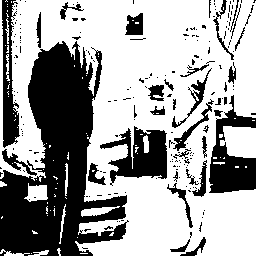

In [220]:
let mut img_gray_bin: Mat = Default::default();

let _ = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    16., 255., opencv::imgproc::THRESH_BINARY).expect("threshold failed.");
opencv_imshow(&img_gray_bin)

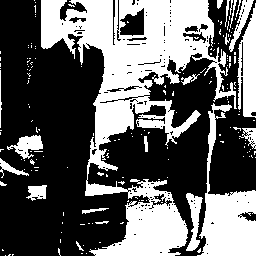

In [221]:
let _ = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    32., 255., opencv::imgproc::THRESH_BINARY).expect("threshold failed.");
opencv_imshow(&img_gray_bin)

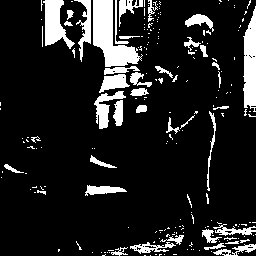

In [222]:
let _ = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    64., 255., opencv::imgproc::THRESH_BINARY).expect("threshold failed.");
opencv_imshow(&img_gray_bin)

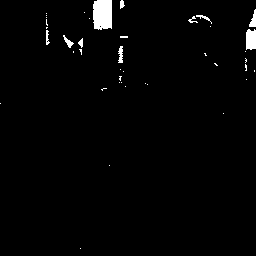

In [223]:
let _ = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    128., 255., opencv::imgproc::THRESH_BINARY).expect("threshold failed.");
opencv_imshow(&img_gray_bin)

The computed threshold value if Otsu's or Triangle methods used: 46


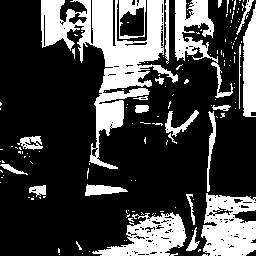

In [229]:
let threshold_value: f64 = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    0., 255., opencv::imgproc::THRESH_BINARY+opencv::imgproc::THRESH_OTSU)?;
println!("The computed threshold value if Otsu's or Triangle methods used: {}", threshold_value);
opencv_imshow(&img_gray_bin)

# Morphology Operation

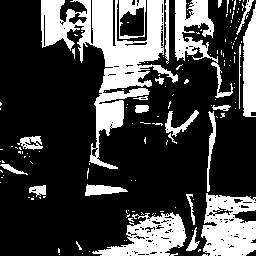

In [230]:
let mut img_gray_bin: Mat = Default::default();
let _: f64 = opencv::imgproc::threshold(
    &img_gray,
    &mut img_gray_bin,
    0., 255., opencv::imgproc::THRESH_BINARY+opencv::imgproc::THRESH_OTSU)?;
opencv_imshow(&img_gray_bin)

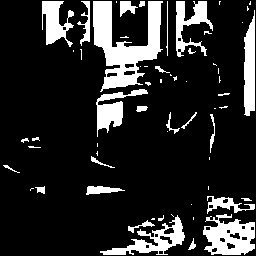

In [232]:
let mut img_gray_erode: Mat = Default::default();
opencv::imgproc::erode(
    &img_gray_bin,
    &mut img_gray_erode,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default()); // 1 is iterations
opencv_imshow(&img_gray_erode)

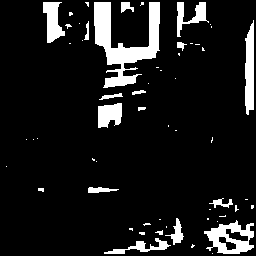

In [233]:
let mut img_gray_erode: Mat = Default::default();
opencv::imgproc::erode(
    &img_gray_bin,
    &mut img_gray_erode,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    2, 0, Default::default()); // 2 is iterations
opencv_imshow(&img_gray_erode)

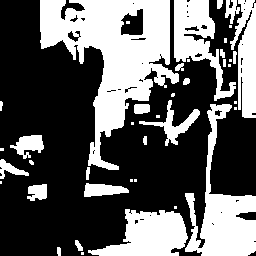

In [235]:
let mut img_gray_dilate: Mat = Default::default();
opencv::imgproc::dilate(
    &img_gray_bin,
    &mut img_gray_dilate,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default()
);
opencv_imshow(&img_gray_dilate)

# Contour Extraction

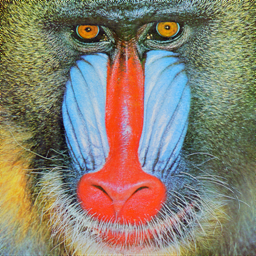

In [215]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(&img)

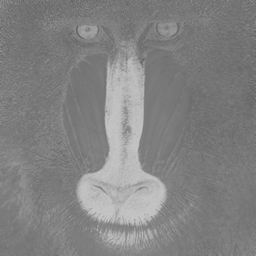

In [216]:
let mut img_lab: Mat = Default::default();
opencv::imgproc::cvt_color(&img, &mut img_lab, opencv::imgproc::COLOR_BGR2Lab, 0).expect("error on cvt_color");

let mut channels_lab: opencv::core::Vector<Mat> = opencv::types::VectorOfMat::new();
// split to Vector<L*A*B channels>.
opencv::core::split(&img_lab, &mut channels_lab).expect("error on split.");
let img_lab_a: Mat = channels_lab.get(1)?.clone().to_owned();
opencv_imshow(&img_lab_a)

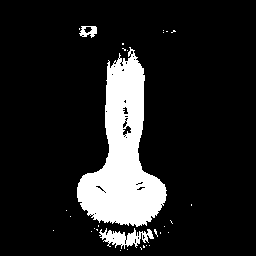

In [217]:
let mut img_lab_a_bin: Mat = Default::default();

let _ = opencv::imgproc::threshold(
    &img_lab_a,
    &mut img_lab_a_bin,
    0., 255., opencv::imgproc::THRESH_BINARY+opencv::imgproc::THRESH_OTSU).expect("threshold failed.");
opencv_imshow(&img_lab_a_bin)

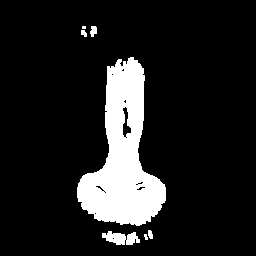

In [218]:
let mut img_erode: Mat = Default::default();
opencv::imgproc::erode(
    &img_lab_a_bin,
    &mut img_erode,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default());
    
let mut img_dilate: Mat = Default::default();
opencv::imgproc::dilate(
    &img_erode,
    &mut img_dilate,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    1, 0, Default::default()
);
opencv_imshow(&img_dilate)

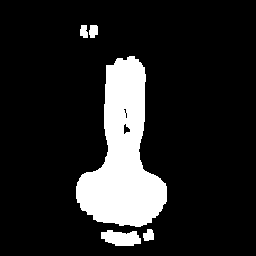

In [165]:
let mut img_erode2: Mat = Default::default();
opencv::imgproc::erode(
    &img_dilate,
    &mut img_erode2,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    2, 0, Default::default()).expect("erode failed.");
    
let mut img_dilate2: Mat = Default::default();
opencv::imgproc::dilate(
    &img_erode,
    &mut img_dilate2,
    &Mat::ones(3, 3, opencv::core::CV_8UC1)?.to_mat()?,
    opencv::core::Point::new(-1, -1),
    2, 0, Default::default()
).expect("dilate failed.");
opencv_imshow(img_dilate2.clone().to_owned())

In [191]:
let mut contours: opencv::core::Vector<opencv::core::Vector<opencv::core::Point>> = Default::default();
opencv::imgproc::find_contours(
    &mut img_dilate2,
    &mut contours,
    opencv::imgproc::RETR_TREE,
    opencv::imgproc::CHAIN_APPROX_SIMPLE,
    Default::default()
).expect("find contours failed.");

let mut contours_area_vector: Vec<f64> = Default::default();
for contour in &contours {
    contours_area_vector.push(opencv::imgproc::contour_area(&contour, false)?);
}
let contours_area_dvector: na::DVector<f64> = na::DVector::from_vec(contours_area_vector);
let max_index = contours_area_dvector.argmax().0 as i32;
println!("{:?}", &max_index);


2


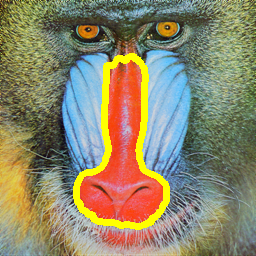

In [219]:
let mut img_contours_result: Mat = img.clone().to_owned();
opencv::imgproc::draw_contours(
    &mut img_contours_result,
    &contours,
    max_index,
    opencv::core::Scalar::new(0.0, 255.0, 255.0, 100.0),
    6,
    0,
    &0.,
    0,
    Default::default()
).expect("draw contours failed.");
opencv_imshow(&img_contours_result)

# Filter: Smoothing

* Box filter
* Median filter
* Gaussian filter
* Bilateral filter

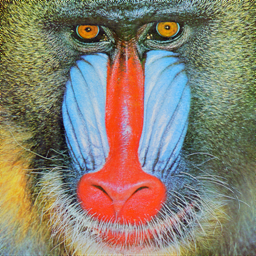

In [279]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED)?;
opencv_imshow(&img)

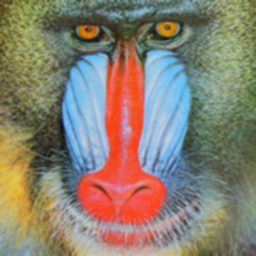

In [285]:
let mut img_blur: Mat = Default::default();
opencv::imgproc::blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(3, 3),
    opencv::core::Point::new(-1, -1),
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

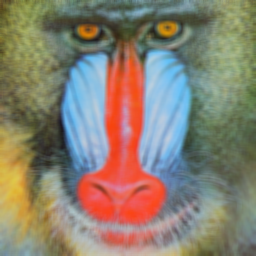

In [286]:
opencv::imgproc::blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(5, 5),
    opencv::core::Point::new(-1, -1),
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

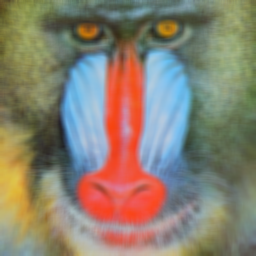

In [287]:
opencv::imgproc::blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(7, 7),
    opencv::core::Point::new(-1, -1),
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

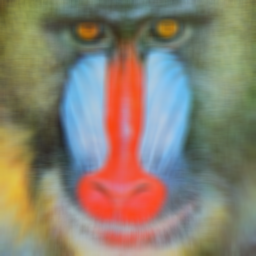

In [288]:
opencv::imgproc::blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(9, 9),
    opencv::core::Point::new(-1, -1),
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

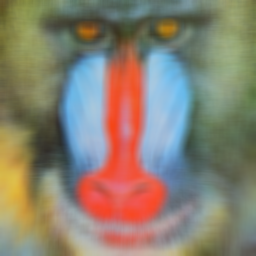

In [289]:
opencv::imgproc::blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(11, 11),
    opencv::core::Point::new(-1, -1),
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

In [ ]:
// TODO: generate_noise_image

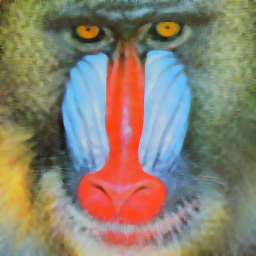

In [290]:
opencv::imgproc::median_blur(
    &img,
    &mut img_blur,
    5
);
opencv_imshow(&img_blur)

In [ ]:
// TODO: median_blur with noise image

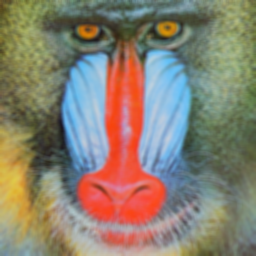

In [295]:
opencv::imgproc::gaussian_blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(5, 5),
    2.,
    0., // the default value of sigma Y is 0.
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

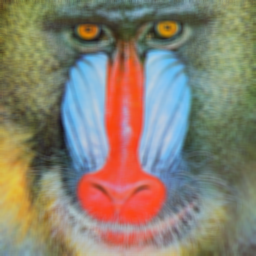

In [296]:
opencv::imgproc::gaussian_blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(5, 5),
    10.,
    0., // the default value of sigma Y is 0.
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

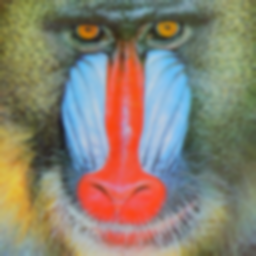

In [297]:
opencv::imgproc::gaussian_blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(11, 11),
    2.,
    0., // the default value of sigma Y is 0.
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur);

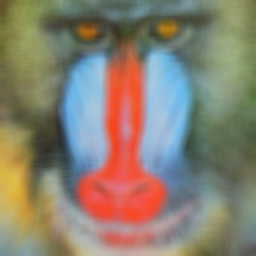

In [298]:
opencv::imgproc::gaussian_blur(
    &img,
    &mut img_blur,
    opencv::core::Size::new(11, 11),
    10.,
    0., // the default value of sigma Y is 0.
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

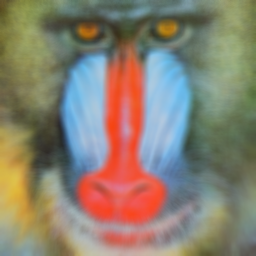

In [299]:
opencv::imgproc::bilateral_filter(
    &img,
    &mut img_blur,
    11,
    100000., // sigma color
    10., // sigma space
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

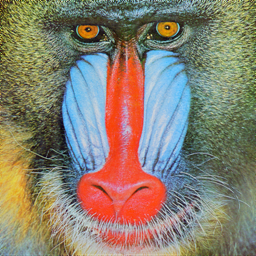

In [300]:
opencv::imgproc::bilateral_filter(
    &img,
    &mut img_blur,
    11,
    1., // sigma color
    10., // sigma space
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

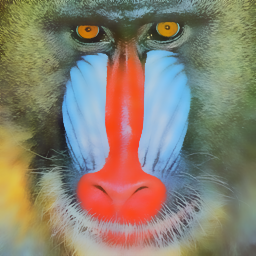

In [301]:
opencv::imgproc::bilateral_filter(
    &img,
    &mut img_blur,
    11,
    100., // sigma color
    10., // sigma space
    opencv::core::BorderTypes::BORDER_REFLECT_101 as i32 // BORDER_REFLECT_101 is BORDER_DEFAULT in C, Python OpenCV
);
opencv_imshow(&img_blur)

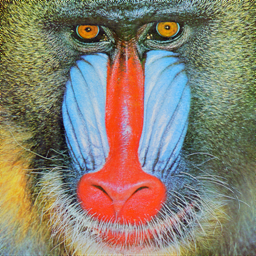

In [302]:
opencv_imshow(&img)

Filter: Edge Extraction

* Sobel filter
* Laplacian filter